<a href="https://colab.research.google.com/github/MariiaSam/data_science/blob/main/Heart_12.10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
print(sklearn.__version__)

1.5.2


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

Задача 1. Застосувати різні методи масштабування і нормалізації даних. Проаналізувати результати

In [33]:
#Задача 1. Масштабування даних
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Приклад даних: зріст (в сантиметрах) і вага (в кілограмах)
data = np.array([[150, 70], [160, 80], [170, 90], [180, 100]])

# Масштабування за допомогою MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(data)

# Масштабування за допомогою StandardScaler
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data)

# Масштабування за допомогою RobustScaler
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(data)

print("Оригінальні дані:")
print(data)
print("\nМасштабовані дані (MinMaxScaler):")
print(min_max_scaled_data)
print("\nМасштабовані дані (StandardScaler):")
print(standard_scaled_data)
print("\nМасштабовані дані (RobustScaler):")
print(robust_scaled_data)


Оригінальні дані:
[[150  70]
 [160  80]
 [170  90]
 [180 100]]

Масштабовані дані (MinMaxScaler):
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]

Масштабовані дані (StandardScaler):
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]

Масштабовані дані (RobustScaler):
[[-1.         -1.        ]
 [-0.33333333 -0.33333333]
 [ 0.33333333  0.33333333]
 [ 1.          1.        ]]


In [34]:
from sklearn.preprocessing import normalize
normalize(data)

array([[0.90618314, 0.42288547],
       [0.89442719, 0.4472136 ],
       [0.88378792, 0.46788772],
       [0.87415728, 0.48564293]])

Завдання 2. Завантажити датасет heart.csv провести аналіз даних, побудувати моделі класифікації, вивести результати, зробити висновки.

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint

In [36]:
from google.colab import files

# Завантаження файлу
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [37]:
df = pd.read_csv('heart.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [38]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [40]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [41]:
missing_percentage = df.isna().sum()*100/df.shape[0]
missing_percentage

,0
age,0.0
anaemia,0.0
creatinine_phosphokinase,0.0
diabetes,0.0
ejection_fraction,0.0
high_blood_pressure,0.0
platelets,0.0
serum_creatinine,0.0
serum_sodium,0.0
sex,0.0


In [42]:
df.duplicated().sum()

3680

In [43]:
duplicates = df[df.duplicated()]
duplicates

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
18,72.0,1,110,0,25,0,237000.0,1.0,140,0,0,65,1
51,45.0,0,308,0,40,1,51000.0,1.3,136,1,1,186,0
58,60.0,0,582,0,40,0,242000.0,3.7,134,1,0,96,1
65,60.0,0,582,0,40,0,242000.0,3.7,134,1,0,96,1
81,45.0,0,615,1,55,0,236000.0,0.8,141,0,0,257,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1


In [44]:
df = df.drop_duplicates()
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.30,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.00,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.90,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.00,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,75.0,0,582,1,30,1,263358.03,1.83,134,1,0,23,1
4855,73.0,0,582,0,20,0,263358.03,1.83,134,1,1,198,1
4862,45.0,0,220,0,35,0,174000.00,0.80,139,1,1,121,0
4965,40.0,1,129,1,35,0,255000.00,0.90,137,1,0,209,0


In [45]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.30,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.00,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.90,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.00,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,75.0,0,582,1,30,1,263358.03,1.83,134,1,0,23,1
4855,73.0,0,582,0,20,0,263358.03,1.83,134,1,1,198,1
4862,45.0,0,220,0,35,0,174000.00,0.80,139,1,1,121,0
4965,40.0,1,129,1,35,0,255000.00,0.90,137,1,0,209,0


In [46]:
corr_matrix = df.corr()
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.108039,-0.098890,-0.077437,0.057771,0.122868,-0.009855,0.197325,-0.044933,0.059648,0.022495,-0.198010,0.224602
anaemia,0.108039,1.000000,-0.200294,0.031989,0.024339,0.047177,-0.006089,0.003655,-0.003755,-0.037188,-0.056350,-0.097733,0.063510
creatinine_phosphokinase,-0.098890,-0.200294,1.000000,-0.042517,0.002157,-0.004945,0.015418,-0.018248,0.047212,0.061105,-0.002144,0.019553,0.055221
diabetes,-0.077437,0.031989,-0.042517,1.000000,0.012477,-0.038261,0.044104,-0.063715,-0.095644,-0.149128,-0.222771,0.008653,-0.001485
ejection_fraction,0.057771,0.024339,0.002157,0.012477,1.000000,0.049202,0.083884,-0.060202,0.194937,-0.143921,0.002126,0.086484,-0.271767
high_blood_pressure,0.122868,0.047177,-0.004945,-0.038261,0.049202,1.000000,-0.004260,0.013098,0.037283,-0.065553,-0.078545,-0.219173,0.113721
platelets,-0.009855,-0.006089,0.015418,0.044104,0.083884,-0.004260,1.000000,0.023062,0.065051,-0.090300,0.043759,-0.001018,-0.044523
serum_creatinine,0.197325,0.003655,-0.018248,-0.063715,-0.060202,0.013098,0.023062,1.000000,-0.263781,0.037234,0.020209,-0.165679,0.290229
serum_sodium,-0.044933,-0.003755,0.047212,-0.095644,0.194937,0.037283,0.065051,-0.263781,1.000000,-0.047862,0.011111,0.130820,-0.250990
sex,0.059648,-0.037188,0.061105,-0.149128,-0.143921,-0.065553,-0.090300,0.037234,-0.047862,1.000000,0.411603,0.017673,0.044045


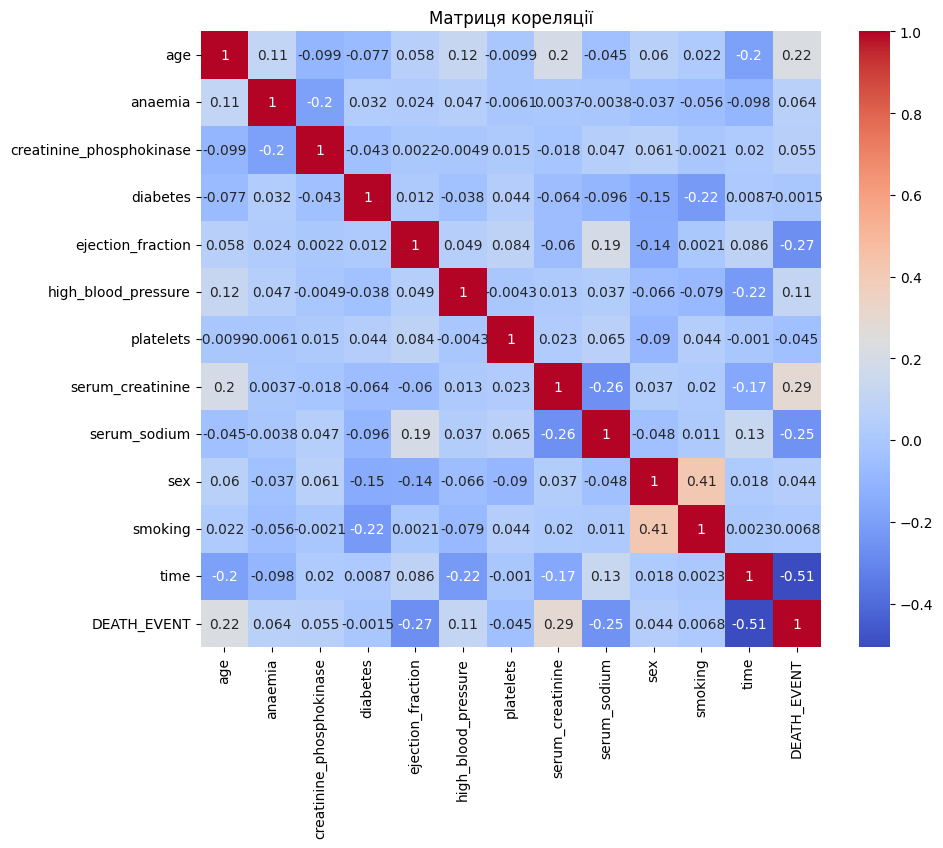

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Матриця кореляції")
plt.show()

In [48]:
correlation_with = corr_matrix['DEATH_EVENT']
correlation_with

,DEATH_EVENT
age,0.224602
anaemia,0.063510
creatinine_phosphokinase,0.055221
diabetes,-0.001485
ejection_fraction,-0.271767
high_blood_pressure,0.113721
platelets,-0.044523
serum_creatinine,0.290229
serum_sodium,-0.250990
sex,0.044045


In [49]:
sorted_correlation = correlation_with.sort_values(ascending=False)
sorted_correlation

,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.290229
age,0.224602
high_blood_pressure,0.113721
anaemia,0.063510
creatinine_phosphokinase,0.055221
sex,0.044045
smoking,0.006774
diabetes,-0.001485
platelets,-0.044523


Поділяємо дані на ознаки та цільову змінну

In [50]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,748,0,45,0,263358.03,1.30,137,1,1,88
1,65.0,0,56,0,25,0,305000.00,5.00,130,1,0,207
2,45.0,0,582,1,38,0,319000.00,0.90,140,0,0,244
3,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,90
4,95.0,1,582,0,30,0,461000.00,2.00,132,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
4731,75.0,0,582,1,30,1,263358.03,1.83,134,1,0,23
4855,73.0,0,582,0,20,0,263358.03,1.83,134,1,1,198
4862,45.0,0,220,0,35,0,174000.00,0.80,139,1,1,121
4965,40.0,1,129,1,35,0,255000.00,0.90,137,1,0,209


In [51]:
y

,DEATH_EVENT
0,0
1,0
2,0
3,0
4,1
...,...
4731,1
4855,1
4862,0
4965,0


Масштабуємо ознаки

In [52]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
743,50.0,1,111,1,40,0,260000.0,0.7,130,1,0,175
1221,75.0,0,319,0,38,1,224000.0,2.5,134,1,0,162
234,70.0,0,75,0,30,0,173000.0,1.2,132,1,0,210
668,45.0,0,2413,1,38,0,382000.0,1.4,140,1,1,280
153,52.0,1,58,1,35,0,282000.0,1.4,136,0,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
1439,45.0,0,582,1,38,0,302000.0,0.9,140,0,0,244
1512,65.0,1,68,1,60,1,304000.0,0.8,140,1,0,79
3559,60.0,0,80,0,35,0,133000.0,1.4,139,1,0,258
1117,70.0,1,125,1,45,1,185000.0,1.2,139,1,1,66


In [53]:
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
854,60.0,1,607,0,40,0,226000.0,0.6,138,0,0,54
876,58.0,1,300,0,40,0,164000.0,1.0,139,0,0,91
758,55.0,0,66,0,40,0,204000.0,1.0,138,1,1,233
50,44.0,0,84,0,40,1,237000.0,0.7,139,0,0,79
3460,50.0,0,250,1,60,0,271000.0,1.0,136,0,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
1325,45.0,0,582,0,20,1,126000.0,1.6,135,1,0,180
1311,80.0,0,148,1,38,0,149000.0,1.9,144,1,1,23
1251,42.0,0,102,0,25,0,215000.0,1.2,142,0,0,74
672,58.0,1,410,0,40,0,164000.0,1.0,139,0,0,91


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled
X_test_scaled

array([[-0.06082899,  1.03077641,  0.03002179, ..., -1.36732045,
        -0.66678066, -1.00534904],
       [-0.22796292,  1.03077641, -0.28615352, ..., -1.36732045,
        -0.66678066, -0.5271406 ],
       [-0.47866382, -0.9701425 , -0.52714707, ...,  0.73135745,
         1.49974357,  1.30814584],
       ...,
       [-1.56503435, -0.9701425 , -0.49007114, ..., -1.36732045,
        -0.66678066, -0.74685799],
       [-0.22796292,  1.03077641, -0.17286595, ..., -1.36732045,
        -0.66678066, -0.5271406 ],
       [ 0.77484065, -0.9701425 ,  0.26483602, ..., -1.36732045,
        -0.66678066,  0.17078523]])

Будуємо модель RandomForestClassifier

**RandomForestClassifier: Простою мовою**

Уяви собі ліс. У цьому лісі ростуть багато різних дерев. Кожне дерево приймає рішення про те, до якого класу належить новий об'єкт, базуючись на своїх власних правилах.
А потім ми підраховуємо голоси всіх дерев і вибираємо клас, який отримав найбільшу кількість голосів. Ось так працює алгоритм Random Forest Classifier.

**Детальніше:**

Дерева рішень:

Кожне дерево в лісі - це дерево рішень. Воно приймає рішення, задаючи ряд питань про об'єкт. Наприклад, якщо ми хочемо класифікувати тварин, дерево може запитати: "Чи літає ця тварина?" Якщо так, то наступне питання може бути: "Чи має вона пір'я?".


**Випадковість:**

 На відміну від звичайних лісів, де дерева ростуть більш-менш однаково, у випадковому лісі кожне дерево будується на випадково вибраній підмножині даних і випадково вибраних ознаках. Це допомагає уникнути перенавчання і зробити модель більш стійкою.


**Голосування:**

 Після того, як всі дерева прийняли рішення, їх голоси підраховуються. Клас, який отримав найбільшу кількість голосів, вважається кінцевим прогнозом.

***Переваги Random Forest Classifier:***

Висока точність: Зазвичай досягає високої точності на різних типах даних.

Гнучкість: Може працювати з різними типами даних, включаючи числові та категоріальні.

Стійкість до перенавчання: Завдяки випадковості менш схильний до перенавчання, ніж окремі дерева рішень.

Важливість ознак: Можна оцінити важливість кожної ознаки для прогнозу.

**Коли використовувати Random Forest:**

Класифікація:
 Для задач класифікації, коли потрібно розподілити об'єкти по різних категоріям.

Великі набори даних:
 Добре працює з великими наборами даних.

Змішані типи даних: Може обробляти як числові, так і категоріальні дані.

In [57]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Оцінка моделі Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       194
           1       0.94      0.90      0.92        70

    accuracy                           0.96       264
   macro avg       0.95      0.94      0.95       264
weighted avg       0.96      0.96      0.96       264



***Отримана точність 95,83% означає, що  модель Random Forest правильно класифікувала 95,83% з усіх спостережень у тестовому наборі даних. Іншими словами, з кожних 100 нових, раніше не бачених даних, модель змогла правильно передбачити клас для 95.***


**Градієнтний бустинг з деревами рішень (Gradient Boosting Classifier)**

 - це потужний алгоритм машинного навчання, який використовується для задач класифікації. Він працює шляхом послідовного побудови ансамблю дерев рішень, де кожне наступне дерево намагається виправити помилки попередніх. Це дозволяє отримати дуже точні моделі.


**Базове дерево:**
 Спочатку будується просте дерево рішень, яке намагається розділити дані на класи.

**Помилки:**

Обчислюється помилка, яку зробило базове дерево.


*Нове дерево:*
Будується нове дерево, яке намагається передбачити цю помилку.

*Ансамбль:*
 Нове дерево додається до ансамблю.


*Ітерації:*
Цей процес повторюється кілька разів, причому кожне нове дерево фокусується на зменшенні помилки попереднього ансамблю.
Прогноз: Остаточний прогноз робиться шляхом усереднення прогнозів всіх дерев в ансамблі.

**Чому градієнтний бустинг працює так добре?**

*Ансамблевий підхід:*
Об'єднання багатьох слабких моделей (дерев) створює сильну модель.


*Поступове покращення:*

 Кожне нове дерево фокусується на найбільш складних прикладах, що дозволяє поступово покращувати точність.


*Гнучкість:*

 Може працювати з різними типами даних і задач.
Висока точність: Зазвичай досягає високої точності на багатьох завданнях.


*Ключові переваги:*

*Висока точність:*

 Часто перевершує інші алгоритми класифікації.

Гнучкість:
 Може працювати з різними типами даних.
Інтерпретованість: Хоча менш інтерпретований, ніж окремі дерева рішень, все ж може дати певне уявлення про важливість ознак.
Коли використовувати градієнтний бустинг:

Великі набори даних: Добре працює з великою кількістю даних.
Складні задачі: Може ефективно вирішувати складні завдання класифікації.
Високі вимоги до точності: Якщо точність прогнозу є критично важливою.
Що потрібно пам'ятати:

Схильність до перенавчання: Може перенавчатися, якщо кількість дерев або глибина дерев занадто великі. Для боротьби з перенавчанням використовують різні техніки, такі як обрізка дерев, раннє зупинення та регуляризація.
Час навчання: Може бути обчислювально дорогим для великих наборів даних.
Підсумок:

Градієнтний бустинг з деревами рішень - це потужний і гнучкий алгоритм, який часто використовується для задач класифікації. Він дозволяє досягти високої точності прогнозування, але вимагає уважного налаштування гіперпараметрів для уникнення перенавчання.

In [58]:
grad_b = GradientBoostingClassifier()
grad_b.fit(X_train_scaled, y_train)
grad_predictions = grad_b.predict(X_test_scaled)
grad_accuracy = accuracy_score(y_test, grad_predictions)
print(classification_report(y_test, grad_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       194
           1       0.89      0.90      0.89        70

    accuracy                           0.94       264
   macro avg       0.93      0.93      0.93       264
weighted avg       0.94      0.94      0.94       264



Будуємо модель логістична регресія

**Логістична регресія: простими словами**

Логістична регресія - це один з найпоширеніших методів машинного навчання, який використовується для задач бінарної класифікації. Це означає, що вона допомагає відповісти на питання "так чи ні", "є чи немає", "належить до класу А чи Б" і т.д.

**Як це працює?**

Уявіть, що ви хочете визначити, чи буде студент здавати іспит. У вас є дані про кількість годин, які він витратив на навчання, його середній бал та інші фактори. Логістична регресія будує модель, яка на основі цих даних намагається передбачити, чи здасть іспит студент.

На відміну від лінійної регресії, яка прогнозує числові значення, логістична регресія прогнозує ймовірність того, що об'єкт належить до певного класу. Вона перетворює лінійну комбінацію ознак в ймовірність за допомогою сигмоїдальної функції.

In [21]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# Оцінка моделі Логістичної регресії
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.8409090909090909
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       194
           1       0.70      0.70      0.70        70

    accuracy                           0.84       264
   macro avg       0.80      0.80      0.80       264
weighted avg       0.84      0.84      0.84       264



***Цей показник означає, що  модель логістичної регресії правильно класифікувала 84,09% спостережень у тестовому наборі даних. Іншими словами, з кожних 100 нових, раніше не бачених даних, модель змогла правильно передбачити клас для 84.***

In [59]:
param_grid = {
    'n_estimators': [10, 50, 100, 200], #кількість дерев
    'max_depth': [None, 10, 20, 30], #максимальна глибина дерева
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] #мінімальна кількість зразків, що повинні бути в листі
}

In [60]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [65]:
gsbe = grid_search.best_estimator_
gsbe.predict(X_test_scaled)
print(classification_report(y_test, gsbe.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       194
           1       0.94      0.87      0.90        70

    accuracy                           0.95       264
   macro avg       0.95      0.93      0.94       264
weighted avg       0.95      0.95      0.95       264



In [66]:
from random import randint
from sklearn.model_selection import RandomizedSearchCV

In [68]:
param_dist = {
    'n_estimators': [randint(10, 200)],
    'max_depth': [None] + list(range(10, 31)),
    'min_samples_split': [randint(2, 11)],
    'min_samples_leaf': [randint(1, 5)]
}

In [70]:
randomized_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
randomized_search.fit(X_train_scaled, y_train)

best_params_random = randomized_search.best_params_
best_params_random

Fitting 5 folds for each of 22 candidates, totalling 110 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 22 is smaller than n_iter=100. Running 22 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 16,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [73]:
rsbe = randomized_search.best_estimator_
rsbe.predict(X_test_scaled)
print(classification_report(y_test, rsbe.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       194
           1       0.86      0.84      0.85        70

    accuracy                           0.92       264
   macro avg       0.90      0.90      0.90       264
weighted avg       0.92      0.92      0.92       264



In [74]:
results_df = pd.DataFrame({
    'True Values': y_test,
    'Predictions': rf_predictions
})
print("\nСправжні та прогнозовані значення для 10 пацієнтів:")
print(results_df.head(10))


Справжні та прогнозовані значення для 10 пацієнтів:
      True Values  Predictions
854             0            0
876             0            0
758             0            0
50              0            0
3460            0            0
596             0            0
679             1            1
1236            0            0
83              0            0
619             1            1


**Gradient Boosting** - це потужний алгоритм машинного навчання, який використовується для задач регресії та класифікації. Він належить до сімейства алгоритмів ансамблю, тобто будує модель шляхом об'єднання багатьох слабких моделей (зазвичай це дерева рішень).

**Ініціалізація:** Спочатку створюється базова модель (найчастіше це константна модель).

**Ітеративне навчання:** На кожній ітерації будується нова модель, яка намагається виправити помилки попередньої моделі. Тобто, нова модель навчається на залишках (residuals) попередньої моделі.

Лінійна комбінація:**** Остаточний прогноз отримується шляхом лінійної комбінації всіх моделей, де кожна модель має свою вагу.

**Переваги Gradient Boosting:**

**Висока точність:**

Зазвичай досягає високої точності на різних типах даних. Гнучкість: Може працювати з різними типами даних, включаючи числові та категоріальні.

Автоматичне виявлення взаємодій:

Здатний виявляти складні взаємодії між ознаками.

In [75]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
gb_predictions = gb_model.predict(X_test_scaled)

# Оцінка моделі Град Бустінгу
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

Gradient Boosting Accuracy: 0.9431818181818182
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       194
           1       0.89      0.90      0.89        70

    accuracy                           0.94       264
   macro avg       0.93      0.93      0.93       264
weighted avg       0.94      0.94      0.94       264



***Точність підвищення градієнта: 0,9431818181818182***

***Це означає, що модель Gradient Boosting правильно класифікувала 94.32% спостережень у тестовому наборі даних. Іншими словами, з кожних 100 нових, раніше не бачених даних, модель змогла правильно передбачити клас для 94.***

Вивести прогнозовані і справжні результати для 10 пацієнтів.

In [76]:
# Вивід справжніх та прогнозованих значень для 10 пацієнтів
results_df = pd.DataFrame({
    'True Values': y_test,
    'Predictions': rf_predictions
})

print("\nСправжні та прогнозовані значення для 10 пацієнтів:")
print(results_df.head(10))


Справжні та прогнозовані значення для 10 пацієнтів:
      True Values  Predictions
854             0            0
876             0            0
758             0            0
50              0            0
3460            0            0
596             0            0
679             1            1
1236            0            0
83              0            0
619             1            1


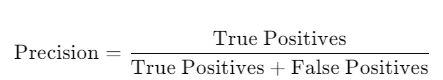

 Висока точність означає, що ваша модель рідко робить помилки, коли прогнозує позитивний клас.

Повнота. Високе значення означає, що модель вміє виявляти більшість позитивних випадків, але може допускати помилки у прогнозах негативних випадків.

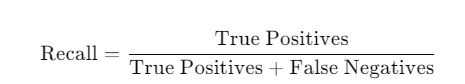

F1-Score — це гармонійне середнє між precision та recall. Воно забезпечує єдиний показник, який враховує як точність, так і повнота.Високий F1-Score вказує на те, що модель має хорошу продуктивність в обох аспектах.

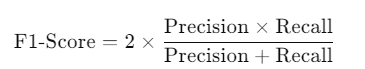

Застосування GridSearchCV для підбору параметрів

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42)

# 1. Grid Search для оптимізації гіперпараметрів
param_grid = {
    'n_estimators': [10, 50, 100, 200], #кількість дерев
    'max_depth': [None, 10, 20, 30], #максимальна глибина дерева
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] #мінімальна кількість зразків, що повинні бути в листі
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)

# Оцінка моделі з найкращими параметрами
best_rf_model = grid_search.best_estimator_
grid_predictions = best_rf_model.predict(X_test_scaled)

# Оцінка точності
print("Grid Search Random Forest Accuracy:", accuracy_score(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters from Grid Search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Grid Search Random Forest Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       194
           1       0.94      0.90      0.92        70

    accuracy                           0.96       264
   macro avg       0.95      0.94      0.95       264
weighted avg       0.96      0.96      0.96       264



In [81]:
# # 2. Randomized Search для оптимізації гіперпараметрів
# param_dist = {
#     'n_estimators': randint(10, 200),
#     'max_depth': [None] + list(range(10, 31)),
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 5)
# }

# random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
# random_search.fit(X_train_scaled, y_train)


# # Найкращі параметри з Randomized Search
# print("Best parameters from Randomized Search:", random_search.best_params_)

# # Оцінка моделі з найкращими параметрами
# best_rf_random_model = random_search.best_estimator_
# random_predictions = best_rf_random_model.predict(X_test_scaled)

# # Оцінка точності
# print("Randomized Search Random Forest Accuracy:", accuracy_score(y_test, random_predictions))
# print(classification_report(y_test, random_predictions))

In [88]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [89]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

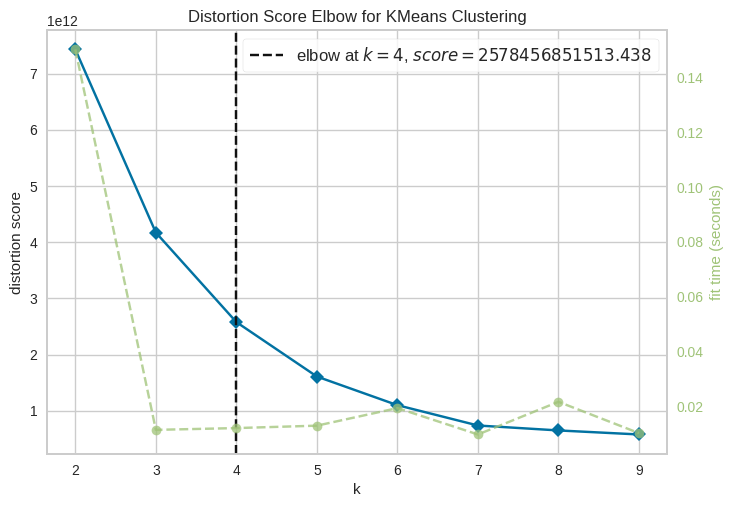

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [92]:
from sklearn.metrics import silhouette_score

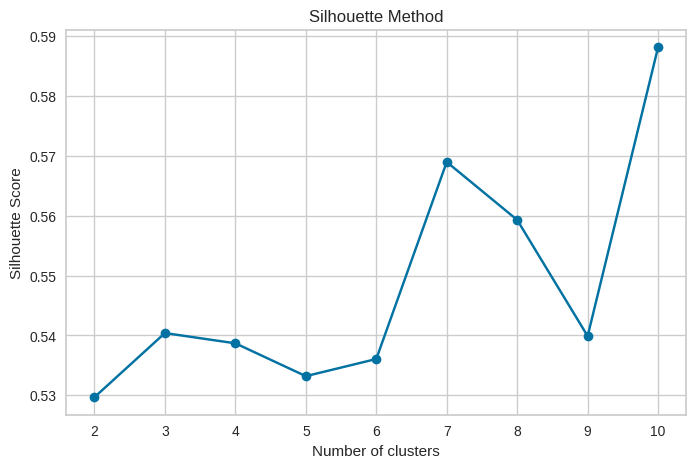

In [93]:
def silhouette_method(x):
    silhouette_scores = []
    for i in range(2, 11):  # Мінімум 2 кластери
        kmeans = KMeans(n_clusters=i, random_state=42)
        labels = kmeans.fit_predict(x)
        silhouette_scores.append(silhouette_score(x, labels))

    # Графік силуетного коефіцієнта
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Викликаємо обидва методи для визначення кількості кластерів

silhouette_method(df)

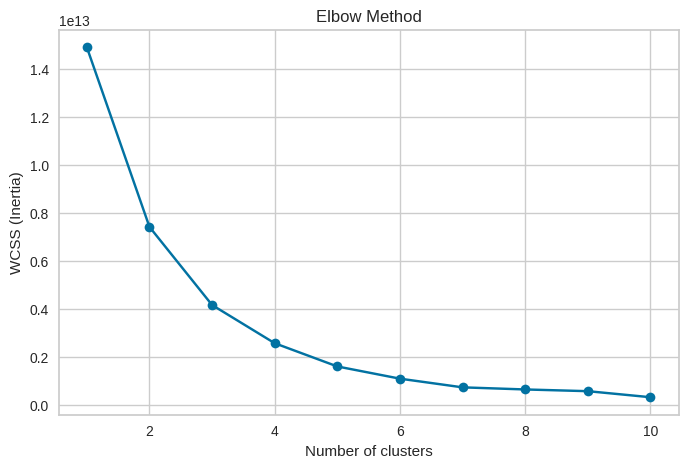

In [94]:
def elbow_method(x):
    wcss = []  # Within-Cluster Sum of Square (інерція)
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)  # інерція

    # Графік метода ліктя
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS (Inertia)')
    plt.show()
elbow_method(df)

In [96]:
from sklearn.decomposition import PCA
#Використання PCA для зменшення розмірності
pca = PCA(n_components=2)  # Вибираємо 2 головні компоненти для прикладу
X_pca = pca.fit_transform(X)

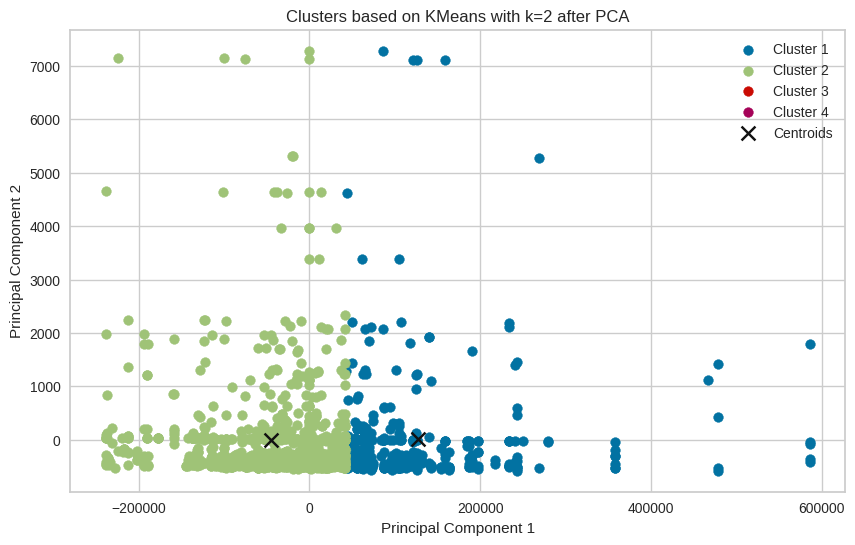

In [97]:
# Кластеризація з KMeans з k = 2 - загальна кількість класів
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Отримання міток кластерів та центроїдів
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Візуалізація кластерів
plt.figure(figsize=(10, 6))

# Відокремлення точок для кожного кластера та відображення їх на графіку
for i in range(4):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i+1}')

# Відображення центроїдів
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on KMeans with k=2 after PCA')
plt.legend()
plt.grid(True)
plt.show()